Tommaso Peritore

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Exercise 11

## 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Solution

In this exercise we will be exploring the composition of a deep neural network. Compared to the previous exercise, the function to fit is now more complex, thus we have to increase the complexity of the model. 

### Data generation
Let's start by defining the function and the parameters of the model. These are taken from the results of the previous exercise `11.1` in the assumption that they will be good starting points for the new model.

In [2]:
# parameters of the problem

# function we are trying to fit with the DNN
# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

# generate training parameters
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.2
bach_size = 32

Now we can generate all the data needed for the training and the testing of the model. Below I am showing the validation and training data, generated randomly in the range $[-1,1]$, with $y$ values calculated using the function $f(x)$ and adding some noise with $\sigma = 0.2$ as defined above.

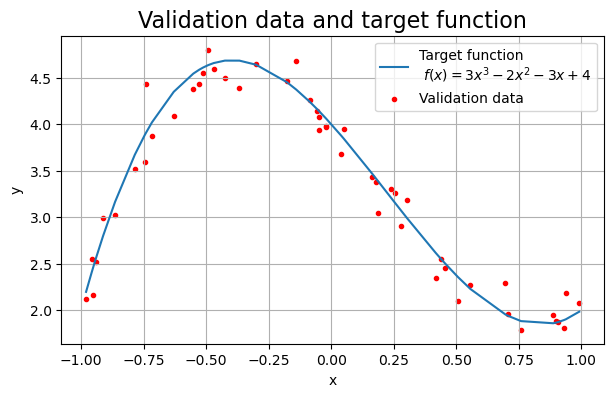

In [3]:
# Generate input data, deviating from ideal behaviour [random noise - sigma]

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (7,4))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

### Network definition
I am now going to construct the Neural Network and train it. I will then proceed with the tuning of the parameters.

The neural network I have built uses three fully connected layers. The input of the entire network has size 1. The output of each layer is passed through the relu (Rectified Linear Unit) activation function. 

Here are the layers that make up the neural network:
- the first layer has $32$ neurons and receives as input the 1-dimensional vector;
- the second layer has again $32$ neurons;
- the third and last layer has a single output neuron. 

The model is compiled using the `adam` optimizer , which is defined in the Keras documentation as "a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments". As loss, the model uses the `mse` loss function (Mean Squared Error), which is commonly used for regression problems. In addition, it is specified that the metric to monitor is also `mse`.

In [4]:
model = tf.keras.Sequential()
# activation: relu-si, elu-ni, exponential-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no
act = 'relu' 
model.add(Dense(32, input_shape = (1,), activation = act))
model.add(Dense(32, activation = act))
model.add(Dense(1, activation = act))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# Get a summary of our composed model
model.summary()

# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training pairs.
# The optimizer finds the best weights minimizing the Mean Square Error loss function 

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(x = x_train, y = y_train, batch_size = bach_size, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 10.3239 - mse: 10.3239 - val_loss: 7.9825 - val_mse: 7.9825
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 6.5557 - mse: 6.5557 - val_loss: 3.9534 - val_mse: 3.9534
Epoch 3/30
32/32 [========

### Network testing
Now that the model is trained, we can test it on the validation data, together with some points on the actual curve. In the plots, I will also test the model on some data outside the range of the training data and plot the results of the predictions. This is done to evaluate the performance of the model both on data it has seen and on data it has not seen before.

In [5]:
print("Results")
w = model.get_weights()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

Results
TEST DATA evaluation
Test loss:      0.051883455365896225
Test accuracy:  0.051883455365896225

EXACT CURVE evaluation
Test loss:      0.018456662073731422
Test accuracy:  0.018456662073731422


4/4 [==============================] - 0s 2ms/step


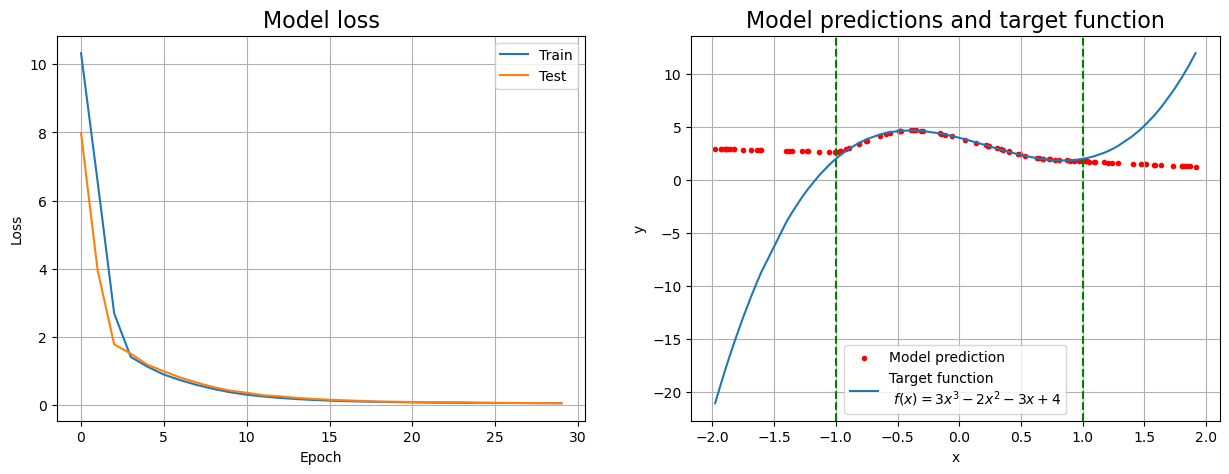

In [6]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()


# Compare the model prediction with the target function

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = model.predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

To the left, we can see the loss function for the training and the validation data. We can see that the loss function for the validation data is higher than the one for the training data as was expected. The loss function for the validation data is still quite low, labeled _Test_ in the plot, which means that the model is able to predict the validation data quite well. We can also note, as predicted in the previous exercise, that also for this model the loss saturates in improvement once $15$ epochs have been reached.

To the right we can see the predictions of the model on new points in the interval $[-2,2]$. We can see that the values within the training interval $[-1,1]$ reproduce the values of the function $f(x)$ quite well. However, outside of this interval, the model is not able to reproduce the behavior of the function, as it has not been trained on these points.


### Observations

After comparing different activation functions, I found that ReLU produced the best results, followed by ELU which performed slightly worse. As for the optimizers, I did not notice significant differences between the various options tested. During all calibration phases, mse was the loss function that provided the best results.

From various testing I was also able to see that the model does a good job at handling the noise.

Here are the activation functions that gave the best results for this scenario.

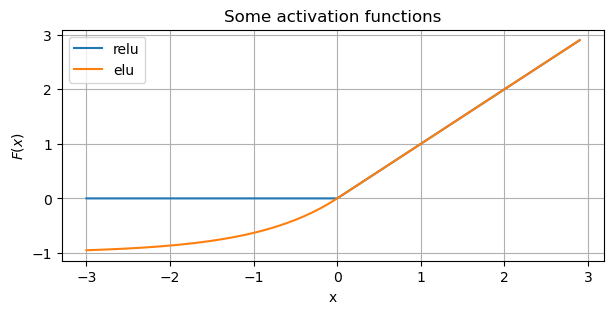

In [7]:
plt.figure(figsize = (7, 3))

plt.title("Some activation functions")
x = np.arange(-3, 3, 0.1)
plt.plot(x, K.eval(activations.relu(x)), label = 'relu')
plt.plot(x, K.eval(activations.elu(x)), label = 'elu')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$F(x)$')
plt.legend()

plt.show()